<a href="https://colab.research.google.com/github/Kamal-Moha/Stroke_Prediction/blob/main/Cleaning_the_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/content/drive/MyDrive/CODING DOJO DS BOOTCAMP/PROJECTS/PROJECT 2/Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


I will drop the id column as its not significant on whether a patient is likely to get a stroke or not

In [3]:
# dropping the id column
df = df.drop(columns='id')

In [4]:
# checking for duplicates
df.duplicated().sum()

0

In [5]:
# check for missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We see all the missing values are in the `bmi` column

**Handling missing values**

I will fill missing bmi with the median bmi of the gender assigned to that row

In [6]:
# grouping the data by gender and finding the median bmi of each gender
median_bmi = df.groupby('gender')['bmi'].transform('median')

# fill missing bmi with the median bmi of the gender type assinged to that row
df['bmi'] = df['bmi'].fillna(median_bmi)


In [27]:
# checking missing values again
df.isna().sum().sum()

0

**Correcting Categorical values**

In [7]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

I have looked at all categorical columns and it has 
the right consistent data.

**Some Graphs**

Text(0.5, 1.0, 'A Histogram showing the count of the different genders in our data')

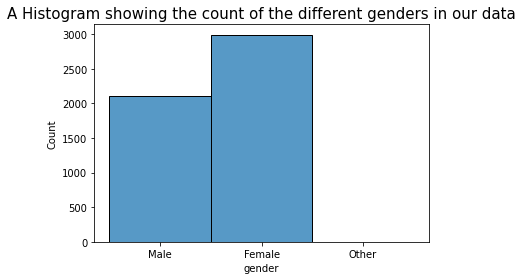

In [25]:
# creating a histplot 
sns.histplot(data=df, x='gender')
# creating the title
plt.title('A Histogram showing the count of the different genders in our data', fontsize=15)

We can see from this graph that there are more Female than Male in our data

Text(0.5, 1.0, 'A Heatmap showing the correlation of different features in our data')

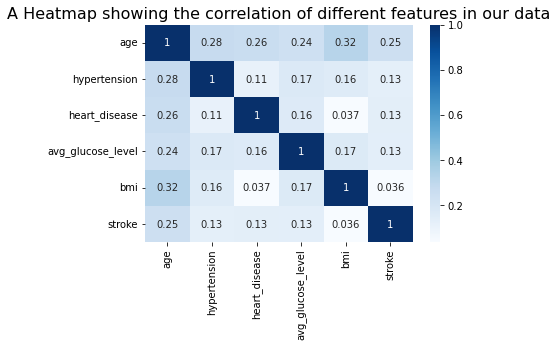

In [26]:
# creating a heatmap of our data
sns.heatmap(df.corr(), annot=True, cmap='Blues')

# creating a title
plt.title('A Heatmap showing the correlation of different features in our data', fontsize=16)

[Text(0, 0, 'age'),
 Text(1, 0, 'hypertension'),
 Text(2, 0, 'heart_disease'),
 Text(3, 0, 'avg_glucose_level'),
 Text(4, 0, 'bmi'),
 Text(5, 0, 'stroke')]

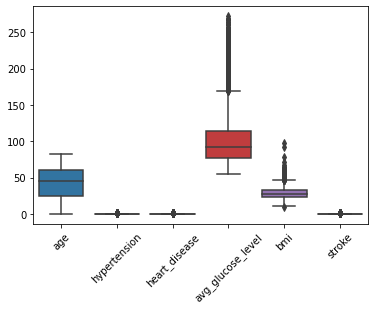

In [20]:
# Identifying Outliers in the data

# making the boxplot
ax = sns.boxplot(data=df)

# rotating the x-axis by 45
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

We can see there are very many high outliers in the `avg_glucose_level` and `bmi` columns.